**Tabla de contenido**

- [El proceso de caminata aleatoria](#El-proceso-de-caminata-aleatoria)
    - [Simulando un proceso de paseo aleatorio](#Simulando-un-proceso-de-paseo-aleatorio)
    - [Identificando un paseo aleatorio](#Identificando-un-paseo-aleatorio)
        - [Stationarity](#Stationarity)
        - [Testing for stationarity](#Testing-for-tationarity)
        - [The autocorrelation function](The-autocorrelation-function)

En el capítulo anterior, comparamos diferentes métodos de `pronóstico ingenuos` y aprendimos que a menudo `sirven como referencias para modelos más sofisticados`. Sin embargo, `hay instancias en las que los métodos más simples ofrecerán los mejores pronósticos`. Este es el caso cuando nos enfrentamos a un proceso de caminata aleatoria.

En este capítulo, aprenderás `qué es un proceso de paseo aleatorio`, `cómo reconocerlo` y `cómo hacer previsiones utilizando modelos de paseo aleatorio`. A lo largo del camino, observaremos los conceptos de diferenciación, estacionariedad y ruido blanco, que volverán en capítulos posteriores a medida que desarrollemos modelos de aprendizaje estadístico más avanzados.

Para los ejemplos de este capítulo, supongamos que deseas comprar acciones de Alphabet Inc. (GOOGL). Idealmente, querrías comprar si se espera que el precio de cierre de la acción suba en el futuro; de lo contrario, tu inversión no será rentable.
Por lo tanto, `decides recopilar datos sobre el precio de cierre diario de GOOGL durante 1 año y utilizar pronósticos de series temporales para determinar el futuro precio de cierre de la acción`. El precio de cierre de GOOGL desde el 27 de abril de 2020 hasta el 27 de abril de 2021 se muestra en la figura 3.1. En el momento de escribir, los datos más allá del 27 de abril de 2021 aún no estaban disponibles.

![Alpabet](fig/Alphabet.png)

`Resulta que el precio de cierre diario de GOOGL se puede modelar utilizando el modelo de paseo aleatorio`. Para ello, `primero determinaremos si nuestro proceso es estacionario o no`. Si es un proceso no estacionario, tendremos que aplicar transformaciones, como la diferenciación, para hacerlo estacionario. `Entonces podremos usar el gráfico de la función de autocorrelación` para concluir que el precio de cierre diario de GOOGL puede ser aproximado por el modelo de paseo aleatorio. 

# El proceso de caminata aleatoria

`Un paseo aleatorio es un proceso en el cual hay una posibilidad igual de subir o bajar por un número aleatorio`. Esto se observa generalmente en datos financieros y económicos, como el precio de cierre diario de GOOGL. Los paseos aleatorios a menudo exponen largos períodos en los que se puede observar una tendencia positiva o negativa. También suelen ir acompañados de cambios repentinos de dirección.

En un proceso de caminata aleatoria, decimos que el valor presente $y_t$ `es una función del valor en el paso de tiempo anterior` $y_{t-1}$, una constante C y un número aleatorio $ϵ_t$, también denominado ruido blanco. Aquí, $ϵ_t$ es la `realización de la distribución normal estándar, que tiene una varianza de 1 y una media de 0`.

Por lo tanto, `podemos expresar matemáticamente un paseo aleatorio con la siguiente ecuación`, donde $y_t$ `es el valor en el tiempo actual` t, C es una constante, $y_{t–1}$ es el valor en el paso de tiempo anterior t–1, y $ϵ_t$ es un número aleatorio.
$$y_t = C + y_{t–1} + ϵ_t$$

`Tenga en cuenta que si la constante C es diferente de cero, designamos este proceso como un paseo aleatorio con deriva`.


## Simulando un proceso de paseo aleatorio

`Para ayudarte a entender el proceso de caminata aleatoria, vamos a simular uno con Python`; de esa manera podrás comprender cómo se comporta una caminata aleatoria y `podremos estudiar sus propiedades en un escenario puramente teórico`. Luego trasladaremos nuestro conocimiento a nuestro ejemplo de la vida real, donde modelaremos y pronosticaremos el precio de cierre de GOOGL.

A partir de la anterior ecuación sabemos que `un paseo aleatorio depende de su valor anterior` $y_{t–1}$ más `ruido blanco` $ϵ_t$ y `una constante` C. `Para simplificar nuestra simulación, supongamos que la constante` C es 0. De esa manera, nuestro paseo aleatorio simulado se puede expresar como $$y_t = y_{t-1} + ϵ_t$$


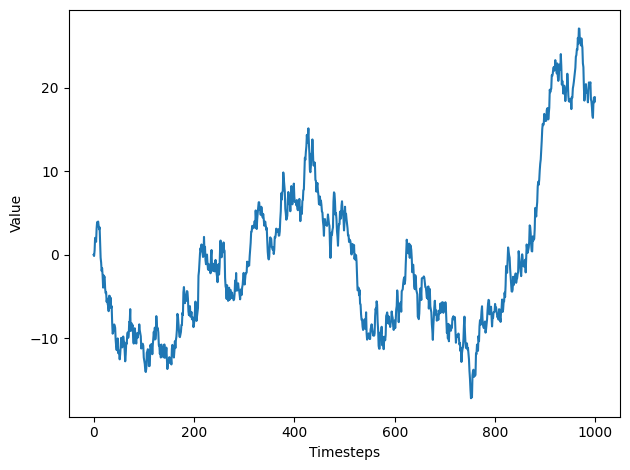

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) # establece una semilla
steps = np.random.standard_normal(1000) # Generar 1,000 números aleatorios de una distribución normal con una media de 0 y una varianza de 1.
steps[0]=0 # Inicializa el primer valor de la serie a 0.
random_walk = np.cumsum(steps) # calculará la suma acumulativa del ruido blanco

fig, ax = plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

Puedes ver las características definitorias de un paseo aleatorio en la figura anterior. Notarás una tendencia positiva durante los primeros 400 pasos de tiempo, seguida de una tendencia negativa y un aumento abrupto hacia el final. Por lo tanto, tenemos tanto cambios repentinos como largos períodos en los que se observa una tendencia.

## Identificando un paseo aleatorio

`Para determinar si nuestra serie temporal puede ser aproximada como un paseo aleatorio o no`, primero debemos definir un paseo aleatorio. En el contexto de series temporales, `un paseo aleatorio se define como una serie cuya primera diferencia es estacionaria y no correlacionada`. Esto significa que el proceso se mueve completamente al azar.

`Pasos a seguir para identificar si los datos de series temporales se pueden aproximar a una caminata aleatoria o no`.
- El primer paso es, naturalmente, recopilar los datos. 
- Luego, probamos la estacionariedad. Si no es estacionaria, aplicamos transformaciones hasta que se logre la estacionariedad.
- Después, podemos trazar la función de autocorrelación (FAC). Si no hay autocorrelación, tenemos una caminata aleatoria.

### Stationarity

`Una serie temporal estacionaria es aquella cuyos propiedades estadísticas no cambian a lo largo del tiempo. En otras palabras, tiene una media, varianza y autocorrelación constantes, y estas propiedades son independientes del tiempo.`

Muchos modelos de pronóstico asumen la estacionaridad. El modelo de media móvil (capítulo 4), el modelo autorregresivo (capítulo 5) y el modelo autorregresivo de media móvil (capítulo 6) asumen todos la estacionaridad. Estos modelos solo se pueden usar si verificamos que los datos son efectivamente estacionarios.

De lo contrario, los modelos no serán válidos y las previsiones no serán confiables. Intuitivamente, esto tiene sentido, porque `si los datos son no estacionarios, sus propiedades van a cambiar con el tiempo`, lo que significaría que nuestros parámetros del modelo también deben cambiar con el tiempo. `Esto significa que no podemos derivar una función de valores futuros como una función de valores pasados`, ya que los coeficientes cambian en cada momento, haciendo que la previsión sea poco fiable.

`Podemos ver la estacionaridad como una suposición que puede facilitar nuestras vidas al hacer pronósticos`. Por supuesto, rara vez veremos una serie temporal estacionaria en su estado original porque a menudo estamos interesados en pronosticar procesos con tendencia o con ciclos estacionales. Es en este momento cuando modelos como ARIMA (capítulo 7) y SARIMA (capítulo 8) entran en juego.

`Por ahora, dado que todavía estamos en las primeras etapas de la predicción de series temporales`, `nos centraremos en series temporales estacionarias`, lo que significa que necesitaremos encontrar formas de transformar nuestras series temporales para hacerlas estacionarias. `Una transformación es simplemente una manipulación matemática de los datos que estabiliza su media y varianza, haciendo que así sea estacionaria.`

`La transformación más simple que se puede aplicar es la diferenciación`. Esta transformación ayuda a `estabilizar la media`, lo que a su vez `elimina o reduce los efectos de tendencia y estacionalidad`. La diferenciación implica calcular la serie de cambios de un momento a otro. Para lograrlo, simplemente restamos el valor del momento anterior $y_{t–1}$ del valor en el presente $y_t$ para obtener el valor diferenciado $y't$. $$y't = y_t – y_{t–1}$$

`Nota`: `La diferenciación es una transformación que calcula el cambio de un instante de tiempo a otro. Esta transformación es útil para estabilizar la media. Aplicar una función logarítmica a la serie puede estabilizar su varianza.`

Es posible diferenciar una serie temporal muchas veces. Tomar la diferencia una vez es aplicar una diferenciación de primer orden. Tomarla una segunda vez sería una diferenciación de segundo orden. A menudo no es necesario diferenciar más de dos veces para obtener una serie estacionaria.

`Mientras que la diferenciación se utiliza para obtener una media constante a lo largo del tiempo`, también debemos asegurarnos de que tengamos una varianza constante para que nuestro proceso sea estacionario. `Se utilizan logaritmos para ayudar a estabilizar la varianza`.

Ten en cuenta que `cuando modelamos una serie temporal que ha sido transformada`, `debemos destransformarla para devolver los resultados del modelo a las unidades de medida originales`.

Ahora que sabemos qué tipo de transformaciones necesitamos aplicar a una serie de tiempo para hacerla estacionaria, debemos encontrar una manera de probar si una serie es estacionaria o no.

### Testing for stationarity

Una vez que se aplica una transformación a una serie temporal, necesitamos probar la estacionariedad para determinar si necesitamos aplicar otra transformación para hacer que la serie temporal sea estacionaria, o si necesitamos transformarla en absoluto. `Una prueba común es la prueba de Dickey-Fuller aumentada (ADF)`.

La prueba ADF verifica la siguiente hipótesis nula: 

- `hay una raíz unitaria presente en una serie temporal.` 
- `La hipótesis alternativa es que no hay raíz unitaria y, por lo tanto, la serie temporal es estacionaria`.

El resultado de esta prueba es la estadística ADF, que es un número negativo. Cuanto más negativo sea, más fuerte es el rechazo de la hipótesis nula. En su implementación `en Python, también se devuelve el valor p.` Si `su valor es menor que 0.05`, también podemos rechazar la hipótesis nula y decir que la serie es estacionaria.

Consideremos una serie temporal muy simple donde el valor presente $y_t$ depende únicamente de su valor pasado $y_{t–1} sujeto a un coeficiente $α_1$, una constante $C$ y ruido blanco $ϵ_t$. Podemos escribir la siguiente expresión general: $$y_t = C + α_1 * y_{t–1} + ϵ_t$$
Aquí, $α_1$ es la raíz de la serie temporal.

`Si la prueba devuelve un valor p menor que un cierto nivel de significancia, típicamente 0.05 o 0.01,` entonces podemos rechazar la hipótesis nula, lo que significa que no hay raíces unitarias, y por lo tanto, la serie es estacionaria.

`Una vez que tenemos una serie estacionaria`, `debemos determinar si hay autocorrelación o no`. `Recuerda que un paseo aleatorio es una serie cuya primera diferencia es estacionaria y no correlacionada`. La prueba ADF se encarga de la parte de estacionariedad, pero necesitaremos usar la función de autocorrelación para determinar si la serie está correlacionada o no.


### The autocorrelation function